In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
import pandas as pd
df = pd.read_csv(datapath + "uci-news-aggregator.csv", thousands = ",") 

In [6]:
print(df)

            ID                                              TITLE  \
0            1  Fed official says weak data caused by weather,...   
1            2  Fed's Charles Plosser sees high bar for change...   
2            3  US open: Stocks fall after Fed official hints ...   
3            4  Fed risks falling 'behind the curve', Charles ...   
4            5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   
5            6  Plosser: Fed May Have to Accelerate Tapering Pace   
6            7          Fed's Plosser: Taper pace may be too slow   
7            8  Fed's Plosser expects US unemployment to fall ...   
8            9  US jobs growth last month hit by weather:Fed P...   
9           10  ECB unlikely to end sterilisation of SMP purch...   
10          11  ECB unlikely to end sterilization of SMP purch...   
11          12              EU's half-baked bank union could work   
12          13       Europe reaches crunch point on banking union   
13          14  ECB FOCUS-Stronger

In [7]:
import pandas as pd
df = pd.read_csv(datapath + "uci-news-aggregator.csv", thousands = ",") 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
ID           422419 non-null int64
TITLE        422419 non-null object
URL          422419 non-null object
PUBLISHER    422417 non-null object
CATEGORY     422419 non-null object
STORY        422419 non-null object
HOSTNAME     422419 non-null object
TIMESTAMP    422419 non-null int64
dtypes: int64(2), object(6)
memory usage: 25.8+ MB
None


In [8]:
# To support both python 2 and python 3 
#from _future_ import division, print_function, unicode_literals 
from __future__ import division, print_function, unicode_literals

# Common imports 
import numpy as np 
import os 

# to make this notebook's output stable across runs 
np.random.seed(42) 

# To plot pretty figures 
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12) 

# Where to save the figures 
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os. path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) 

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300): 
    path = os. path.join(IMAGES_PATH, fig_id + "," + fig_extension) 
    print("Saving figure", fig_id)
    if tight_layout: 
        plt.tight_layout() 
    plt.savefig(path, format=fig_extension, dpi=resolution) 

# Ignore useless warnings (see Scipy issue #5998) 
import warnings 
warnings.filterwarnings (action="ignore", message="^internal gelsd") 

In [9]:
print(df.describe())

                  ID     TIMESTAMP
count  422419.000000  4.224190e+05
mean   211536.764594  1.400445e+12
std    122102.839707  3.733088e+09
min         1.000000  1.394470e+12
25%    105801.500000  1.397349e+12
50%    211655.000000  1.399990e+12
75%    317273.500000  1.403775e+12
max    422937.000000  1.409229e+12


In [10]:
#shows first 5 lines on each category/column
print(df.head())

   ID                                              TITLE  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                                                 URL          PUBLISHER  \
0  http://www.latimes.com/business/money/la-fi-mo...  Los Angeles Times   
1  http://www.livemint.com/Politics/H2EvwJSK2VE6O...           Livemint   
2  http://www.ifamagazine.com/news/us-open-stocks...       IFA Magazine   
3  http://www.ifamagazine.com/news/fed-risks-fall...       IFA Magazine   
4  http://www.moneynews.com/Economy/federal-reser...          Moneynews   

  CATEGORY                          STORY             HOSTNAME      TIMESTAMP  
0        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM      www.latimes.com  1394470370698  
1        b  ddUyU0VZz0BRneMi

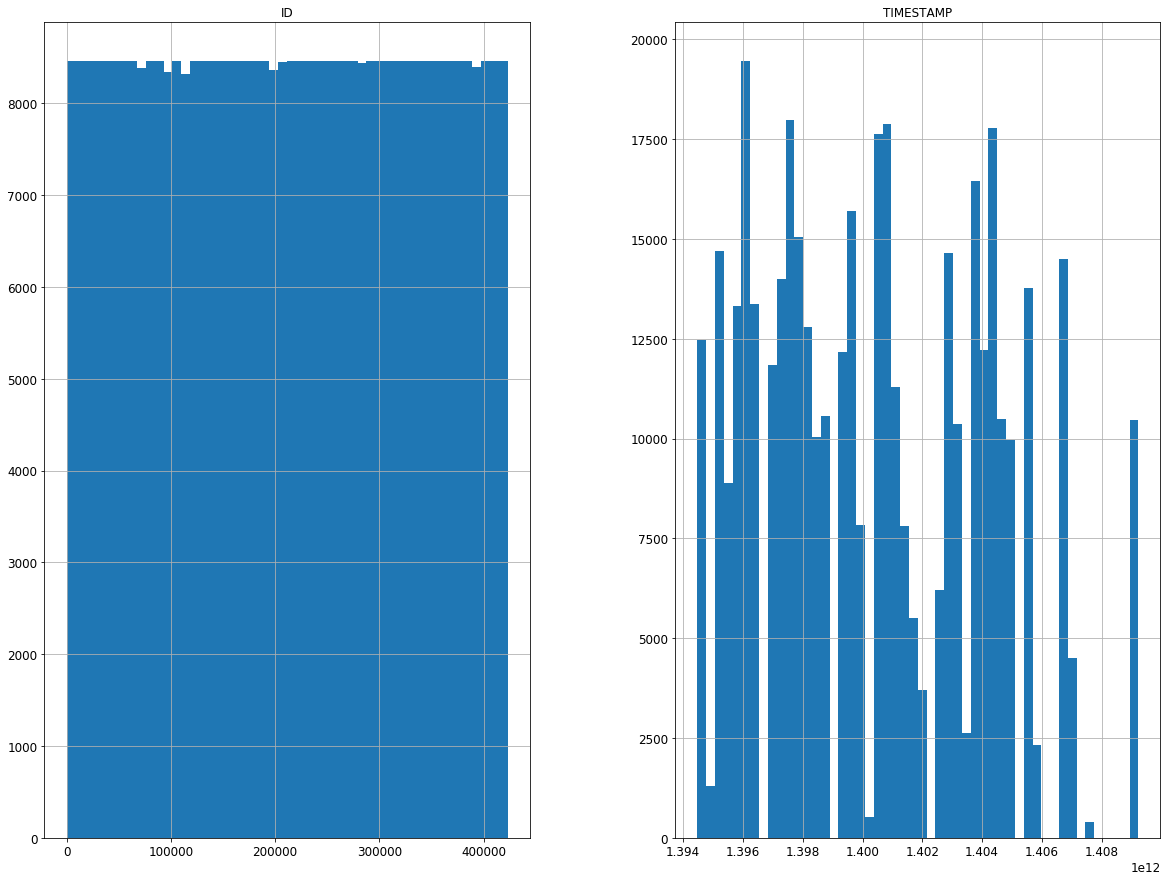

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15))
plt.show() 

In [12]:
# to make this notebook's output stable across runs 
np.random.seed(42)

In [13]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices] 

In [14]:
train_set, test_set = split_train_test(df, 0.2) 
print(len(train_set), "train +", len(test_set), "test") 

337936 train + 84483 test


In [15]:
from zlib import crc32 
def test_set_check(identifier, test_ratio): 
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32 

def split_train_test_by_id(data, test_ratio, id_column): 
    ids = data[id_column] 
    in_test_set = ids.apply(lambda id : test_set_check(id , test_ratio)) 
    return data.loc[~in_test_set], data.loc[in_test_set] 

In [16]:
import hashlib 

def test_set_check(identifier, test_ratio, hash=hashlib.md5): 
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio 

In [17]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5): 
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio 

In [18]:
df_with_id = df.reset_index() # adds an 'index' column 
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

In [19]:
test_set.head()

,index,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
4,4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
5,5,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212
11,11,12,EU's half-baked bank union could work,http://blogs.reuters.com/hugo-dixon/2014/03/10...,Reuters UK \(blog\),b,dPhGU51DcrolUIMxbRm0InaHGA2XM,blogs.reuters.com,1394470501587
20,20,21,Noyer Says Strong Euro Creates Unwarranted Eco...,http://www.businessweek.com/news/2014-03-10/no...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503366
23,23,24,China's trade deficit and structural worries i...,http://www.fxstreet.com/analysis/strategic-cur...,FXstreet.com,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.fxstreet.com,1394470503887


In [20]:
from sklearn.model_selection import train_test_split 
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42) 


In [21]:
test_set.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
280241,280701,Only 2 people allowed in the delivery room: Pr...,http://indiatoday.intoday.in/story/only-2-peop...,India Today,e,dQEXtwpswiNW-4MJkBLcTFNZCQ42M,indiatoday.intoday.in,1402685897020
96315,96509,"A wealth of info, a welter of questions",http://www.kspr.com/news/nationworld/A-wealth-...,KSPR,b,dEvmvYzvzgsQELMCi7irY9O3H-7MM,www.kspr.com,1397228331504
280410,280870,Robin Thicke Naming Album After Paula Patton…,http://hollywoodlife.com/2014/06/12/robin-thic...,Hollywood Life,e,dflCph2zJvu4FcMqqxixfobGH4qjM,hollywoodlife.com,1402687067074
284975,285435,Actress And Civil Rights Activist Ruby Dee Die...,http://wegotthiscovered.com/movies/actress-civ...,We Got This Covered,e,duy-eYWM3GLFeSMlLjm7WEMy_7YJM,wegotthiscovered.com,1402756865421
379072,379532,Feds to review Ga. Medicaid backlog,http://beta.mirror.augusta.com/news/government...,McDuffie Mirror,m,d_fPPa35mZtsqpM0o8GY7u6XaAydM,beta.mirror.augusta.com,1405443795115


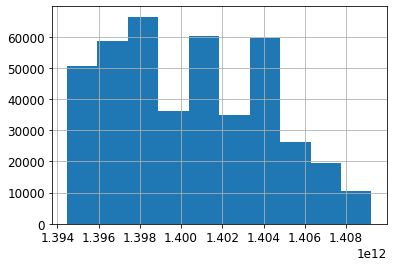

In [22]:
df["TIMESTAMP"].hist()

In [23]:
df["TIMESTAMP"] = pd.cut(df["TIMESTAMP"], 
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
    labels=[1, 2, 3, 4, 5]) 

In [24]:
df["TIMESTAMP"].value_counts()

5    422419
4         0
3         0
2         0
1         0
Name: TIMESTAMP, dtype: int64

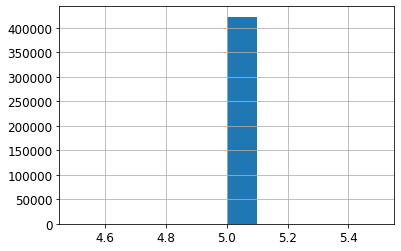

In [25]:
df["TIMESTAMP"].hist()

In [26]:
df.shape

(422419, 8)

In [27]:
df.isnull().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    2
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [28]:
df.dropna(subset=['PUBLISHER'], inplace = True)

In [29]:
#dropd the 2 articles with null values
df.shape

(422417, 8)

In [30]:
#check to make sure null values taken out
df.isnull().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    0
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [31]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,5
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,5
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,5
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,5
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,5


In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [33]:
X, y = df(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

TypeError: 'DataFrame' object is not callable